**Preparing data:** Run the next cells to download and prepare the datasets and util functions.

In [1]:
import sys
download_data = False

if 'google.colab' in sys.modules:
    download_data = True

In [2]:
if download_data:
    !wget --no-cache -O init.py -q https://raw.githubusercontent.com/DaielChom/ann-predict-future-sales/master/init.py
    from init import download_utils, unzip_sales_dataset, dataset_dir
    download_utils(force_download=True)

In [3]:
if download_data:
    !mkdir ./local/datasets/
    !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=19208gOk2e6cpZ9dxtGF5HKHGYWn01VRo" -O local/datasets/sales.zip && rm -rf /tmp/cookies.txt

In [4]:
if download_data:
    unzip_sales_dataset()

**Libraries**

In [5]:
import pandas as pd
import progressbar
import matplotlib.pyplot as plt
import local.lib as lib


from init import dataset_dir

# Building dataset

### 1. Filter selected shops and items

In [6]:
dataset = lib.load_dataset(dataset_dir)
dataset.head()

,date,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,2013-01-02,59,22154,999.00,1.0,37
1,2013-01-03,25,2552,899.00,1.0,58
2,2013-01-05,25,2552,899.00,-1.0,58
3,2013-01-06,25,2554,1709.05,1.0,58
4,2013-01-15,25,2555,1099.00,1.0,56


In [7]:
shops = lib.shops_to_use
items = lib.items_to_use

In [8]:
len(items), len(shops)

(243, 48)

In [9]:
data = []

for item in progressbar.ProgressBar()(items):
    for shop in shops:
        
        aux = dataset[(dataset.shop_id==shop)&(dataset.item_id==item)]
        aux.index = pd.to_datetime(aux.date)
        _ = aux.pop("date")
        aux = aux.sort_index()
        
        aux2 = aux.item_cnt_day.resample("1M").sum().to_frame("{}_{}".format(shop, item))
        
        data.append(aux2)

100% |########################################################################|


In [10]:
shop_item = pd.concat(data, axis=1)

In [11]:
shop_item.head()

,2_32,3_32,4_32,5_32,6_32,7_32,10_32,12_32,13_32,14_32,...,50_22167,51_22167,52_22167,53_22167,54_22167,55_22167,56_22167,57_22167,58_22167,59_22167
date,,,,,,,,,,,,,,,,,,,,,
2013-01-31,NaN,3.0,2.0,NaN,8.0,1.0,NaN,NaN,6.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-02-28,NaN,0.0,1.0,2.0,10.0,2.0,NaN,NaN,3.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-03-31,NaN,2.0,4.0,7.0,10.0,6.0,1.0,NaN,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,0.0,0.0,1.0,1.0,3.0,0.0,1.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-31,NaN,1.0,1.0,2.0,1.0,1.0,0.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
aux = shop_item.isna().mean()
to_use = aux[aux<0.7].index.tolist()

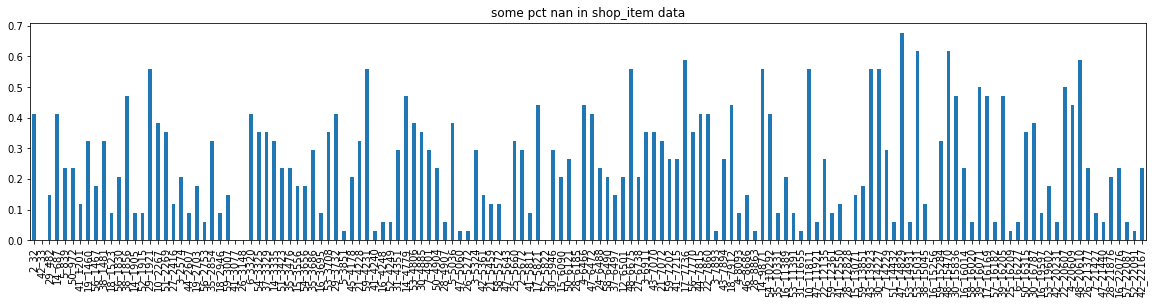

In [13]:
shop_item[to_use[::75]].isna().mean().plot.bar(figsize=(20,4))
#plt.grid()
plt.xticks(rotation="vertical");
plt.title("some pct nan in shop_item data");

In [ ]:
shop_item

In [14]:
shop_item[to_use].shape

(34, 10734)

In [58]:
#shop_item[to_use].to_csv(dataset_dir+"base_dataset.csv")